# Practical Deep Learning for Coders, v2

# Lesson7_human_numbers

# Human numbers 
# 人类数字问题

In [1]:
from fastai.text import *

In [2]:
bs=64

## Data 数据

In [3]:
path = untar_data(URLs.HUMAN_NUMBERS)
path.ls()

[PosixPath('/home/dlinano/.fastai/data/human_numbers/train.txt'),
 PosixPath('/home/dlinano/.fastai/data/human_numbers/models'),
 PosixPath('/home/dlinano/.fastai/data/human_numbers/valid.txt')]

In [4]:
def readnums(d): return [', '.join(o.strip() for o in open(path/d).readlines())]

In [5]:
train_txt = readnums('train.txt'); train_txt[0][:80]

'one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirt'

In [6]:
valid_txt = readnums('valid.txt'); valid_txt[0][-80:]

' nine thousand nine hundred ninety eight, nine thousand nine hundred ninety nine'

In [7]:
train = TextList(train_txt, path=path)
valid = TextList(valid_txt, path=path)

src = ItemLists(path=path, train=train, valid=valid).label_for_lm()
data = src.databunch(bs=bs)

In [8]:
data.show_batch()

idx,text
0,"thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight , thirty nine , forty , forty one , forty two , forty three , forty four , forty five , forty six , forty seven , forty eight , forty nine , fifty , fifty one , fifty two , fifty three , fifty four ,"
1,"twenty six , two hundred twenty seven , two hundred twenty eight , two hundred twenty nine , two hundred thirty , two hundred thirty one , two hundred thirty two , two hundred thirty three , two hundred thirty four , two hundred thirty five , two hundred thirty six , two hundred thirty seven , two hundred thirty eight , two hundred thirty nine , two hundred forty"
2,", three hundred ninety , three hundred ninety one , three hundred ninety two , three hundred ninety three , three hundred ninety four , three hundred ninety five , three hundred ninety six , three hundred ninety seven , three hundred ninety eight , three hundred ninety nine , four hundred , four hundred one , four hundred two , four hundred three , four hundred four , four"
3,"fifty seven , five hundred fifty eight , five hundred fifty nine , five hundred sixty , five hundred sixty one , five hundred sixty two , five hundred sixty three , five hundred sixty four , five hundred sixty five , five hundred sixty six , five hundred sixty seven , five hundred sixty eight , five hundred sixty nine , five hundred seventy , five hundred seventy one"
4,", seven hundred twenty five , seven hundred twenty six , seven hundred twenty seven , seven hundred twenty eight , seven hundred twenty nine , seven hundred thirty , seven hundred thirty one , seven hundred thirty two , seven hundred thirty three , seven hundred thirty four , seven hundred thirty five , seven hundred thirty six , seven hundred thirty seven , seven hundred thirty eight ,"


In [9]:
train[0].text[:100]

'xxbos one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirtee'

In [10]:
len(data.valid_ds[0][0].data)

13017

In [11]:
data.bptt, len(data.valid_dl)

(70, 3)

In [12]:
13017/70/bs

2.905580357142857

In [13]:
it = iter(data.valid_dl)
x1,y1 = next(it)
x2,y2 = next(it)
x3,y3 = next(it)
it.close()

In [14]:
x1.numel()+x2.numel()+x3.numel()

13440

In [15]:
x1.shape,y1.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

In [16]:
x2.shape,y2.shape

(torch.Size([64, 70]), torch.Size([64, 70]))

##### 这里，你可以看到第一个批次的X（记住，我们已经把这些都变成数字了），这是第一个批次的Y。你可以看到这里x1 是[2, 18, 10, 11, 8, ...], y1 是 [18, 10, 11, 8, ...]。y1比x1偏移了一个位置。这是因为，我们要做一个语言模型，我们要预测下一个单词，所以2后面应该是18，18后面应该是10。

In [32]:
x1[0,:]

tensor([ 2, 19, 11, 12,  9, 19, 11, 13,  9, 19, 11, 14,  9, 19, 11, 15,  9, 19,
        11, 16,  9, 19, 11, 17,  9, 19, 11, 18,  9, 19, 11, 19,  9, 19, 11, 20,
         9, 19, 11, 29,  9, 19, 11, 30,  9, 19, 11, 31,  9, 19, 11, 32,  9, 19,
        11, 33,  9, 19, 11, 34,  9, 19, 11, 35,  9, 19, 11, 36,  9, 19],
       device='cuda:0')

In [33]:
y1[0,:]

tensor([19, 11, 12,  9, 19, 11, 13,  9, 19, 11, 14,  9, 19, 11, 15,  9, 19, 11,
        16,  9, 19, 11, 17,  9, 19, 11, 18,  9, 19, 11, 19,  9, 19, 11, 20,  9,
        19, 11, 29,  9, 19, 11, 30,  9, 19, 11, 31,  9, 19, 11, 32,  9, 19, 11,
        33,  9, 19, 11, 34,  9, 19, 11, 35,  9, 19, 11, 36,  9, 19, 11],
       device='cuda:0')

词频列表：：
一旦我们从文本中完成了标准词提取，就会生成一个包含所有词汇的列表，将标准词转化成整数。这里我们只保留至少出现两次的标准词，并设置词库上限为60,000(默认设置), 同时将所有不能分进行分词的词标记为“未知标准词” 

id和标准词的关系存储在数据集的`vocab`属性中，在字典 `itos` 中（由int类型转换成string类型）。

In [17]:
data.valid_ds.vocab.itos[:20]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 ',',
 'hundred',
 'thousand',
 'one',
 'two',
 'three',
 'four',
 'five',
 'six',
 'seven',
 'eight']

In [18]:
v = data.valid_ds.vocab

##### 你可以取这个数据集的词汇表（vocab），一个vocab有一个textify，如果我们给textify输入这些参数，它会在vocab里把单词找出来。你在这里可以看到xxbos eight thousand one，但在y里，没有xxbos，只是eight thousand one。xxbos之后是eight，eight之后是thousand，thousand之后是one

In [38]:
v.textify(x1[0])

'xxbos eight thousand one , eight thousand two , eight thousand three , eight thousand four , eight thousand five , eight thousand six , eight thousand seven , eight thousand eight , eight thousand nine , eight thousand ten , eight thousand eleven , eight thousand twelve , eight thousand thirteen , eight thousand fourteen , eight thousand fifteen , eight thousand sixteen , eight thousand seventeen , eight'

In [39]:
v.textify(y1[0])

'eight thousand one , eight thousand two , eight thousand three , eight thousand four , eight thousand five , eight thousand six , eight thousand seven , eight thousand eight , eight thousand nine , eight thousand ten , eight thousand eleven , eight thousand twelve , eight thousand thirteen , eight thousand fourteen , eight thousand fifteen , eight thousand sixteen , eight thousand seventeen , eight thousand'

In [40]:
v.textify(x2[0])

'thousand eighteen , eight thousand nineteen , eight thousand twenty , eight thousand twenty one , eight thousand twenty two , eight thousand twenty three , eight thousand twenty four , eight thousand twenty five , eight thousand twenty six , eight thousand twenty seven , eight thousand twenty eight , eight thousand twenty nine , eight thousand thirty , eight thousand thirty one , eight thousand thirty two ,'

In [41]:
v.textify(x3[0])

'eight thousand thirty three , eight thousand thirty four , eight thousand thirty five , eight thousand thirty six , eight thousand thirty seven , eight thousand thirty eight , eight thousand thirty nine , eight thousand forty , eight thousand forty one , eight thousand forty two , eight thousand forty three , eight thousand forty four , eight thousand forty five , eight thousand forty six , eight'

In [42]:
v.textify(x1[1])

', eight thousand forty six , eight thousand forty seven , eight thousand forty eight , eight thousand forty nine , eight thousand fifty , eight thousand fifty one , eight thousand fifty two , eight thousand fifty three , eight thousand fifty four , eight thousand fifty five , eight thousand fifty six , eight thousand fifty seven , eight thousand fifty eight , eight thousand fifty nine ,'

In [43]:
v.textify(x2[1])

'eight thousand sixty , eight thousand sixty one , eight thousand sixty two , eight thousand sixty three , eight thousand sixty four , eight thousand sixty five , eight thousand sixty six , eight thousand sixty seven , eight thousand sixty eight , eight thousand sixty nine , eight thousand seventy , eight thousand seventy one , eight thousand seventy two , eight thousand seventy three , eight thousand'

In [44]:
v.textify(x3[1])

'seventy four , eight thousand seventy five , eight thousand seventy six , eight thousand seventy seven , eight thousand seventy eight , eight thousand seventy nine , eight thousand eighty , eight thousand eighty one , eight thousand eighty two , eight thousand eighty three , eight thousand eighty four , eight thousand eighty five , eight thousand eighty six , eight thousand eighty seven , eight thousand eighty'

In [45]:
v.textify(x3[-1])

'ninety , nine thousand nine hundred ninety one , nine thousand nine hundred ninety two , nine thousand nine hundred ninety three , nine thousand nine hundred ninety four , nine thousand nine hundred ninety five , nine thousand nine hundred ninety six , nine thousand nine hundred ninety seven , nine thousand nine hundred ninety eight , nine thousand nine hundred ninety nine xxbos eight thousand one , eight'

In [19]:
data.show_batch(ds_type=DatasetType.Valid)

idx,text
0,"thousand forty seven , eight thousand forty eight , eight thousand forty nine , eight thousand fifty , eight thousand fifty one , eight thousand fifty two , eight thousand fifty three , eight thousand fifty four , eight thousand fifty five , eight thousand fifty six , eight thousand fifty seven , eight thousand fifty eight , eight thousand fifty nine , eight thousand sixty , eight thousand sixty"
1,"eight , eight thousand eighty nine , eight thousand ninety , eight thousand ninety one , eight thousand ninety two , eight thousand ninety three , eight thousand ninety four , eight thousand ninety five , eight thousand ninety six , eight thousand ninety seven , eight thousand ninety eight , eight thousand ninety nine , eight thousand one hundred , eight thousand one hundred one , eight thousand one"
2,"thousand one hundred twenty four , eight thousand one hundred twenty five , eight thousand one hundred twenty six , eight thousand one hundred twenty seven , eight thousand one hundred twenty eight , eight thousand one hundred twenty nine , eight thousand one hundred thirty , eight thousand one hundred thirty one , eight thousand one hundred thirty two , eight thousand one hundred thirty three , eight thousand"
3,"three , eight thousand one hundred fifty four , eight thousand one hundred fifty five , eight thousand one hundred fifty six , eight thousand one hundred fifty seven , eight thousand one hundred fifty eight , eight thousand one hundred fifty nine , eight thousand one hundred sixty , eight thousand one hundred sixty one , eight thousand one hundred sixty two , eight thousand one hundred sixty three"
4,"thousand one hundred eighty three , eight thousand one hundred eighty four , eight thousand one hundred eighty five , eight thousand one hundred eighty six , eight thousand one hundred eighty seven , eight thousand one hundred eighty eight , eight thousand one hundred eighty nine , eight thousand one hundred ninety , eight thousand one hundred ninety one , eight thousand one hundred ninety two , eight thousand"


## Single fully connected model 单全连接模型

In [47]:
data = src.databunch(bs=bs, bptt=3)

In [48]:
x,y = data.one_batch()
x.shape,y.shape

(torch.Size([64, 3]), torch.Size([64, 3]))

In [49]:
nv = len(v.itos); nv

40

In [50]:
nh=64

In [51]:
def loss4(input,target): return F.cross_entropy(input, target[:,-1])
def acc4 (input,target): return accuracy(input, target[:,-1])

In [52]:
x.shape

torch.Size([64, 3])

In [54]:
x[62]

tensor([18, 11, 18])

In [55]:
x[:,0]

tensor([13, 13, 10,  9, 18,  9, 11, 11, 13, 19, 16, 23, 24,  9, 12,  9, 13, 14,
        15, 11, 10, 22, 15,  9, 10, 14, 11, 16, 10, 28, 11,  9, 20,  9, 15, 15,
        11, 18, 10, 28, 23, 24,  9, 16, 10, 16, 19, 20, 12, 10, 22, 16, 17, 17,
        17, 11, 24, 10,  9, 15, 16,  9, 18, 11])

In [56]:
class Model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv,nh)  # green arrow
        self.h_h = nn.Linear(nh,nh)     # brown arrow
        self.h_o = nn.Linear(nh,nv)     # blue arrow
        self.bn = nn.BatchNorm1d(nh)
        
    def forward(self, x):
        h = self.bn(F.relu(self.h_h(self.i_h(x[:,0]))))
        if x.shape[1]>1:
            h = h + self.i_h(x[:,1])
            h = self.bn(F.relu(self.h_h(h)))
        if x.shape[1]>2:
            h = h + self.i_h(x[:,2])
            h = self.bn(F.relu(self.h_h(h)))
        return self.h_o(h)

In [57]:
learn = Learner(data, Model0(), loss_func=loss4, metrics=acc4)

In [72]:
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,acc4,time
0,3.611148,3.618677,0.049403,00:06
1,3.086851,3.092869,0.415671,00:06
2,2.500141,2.559362,0.463925,00:06
3,2.167909,2.306844,0.465533,00:06
4,2.040054,2.220814,0.465993,00:06
5,2.013637,2.208322,0.465993,00:06


## Same thing with a loop 使用一个循环来完成同样的功能

In [58]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv,nh)  # green arrow
        self.h_h = nn.Linear(nh,nh)     # brown arrow
        self.h_o = nn.Linear(nh,nv)     # blue arrow
        self.bn = nn.BatchNorm1d(nh)
        
    def forward(self, x):
        h = torch.zeros(x.shape[0], nh).to(device=x.device)
        for i in range(x.shape[1]):
            h = h + self.i_h(x[:,i])
            h = self.bn(F.relu(self.h_h(h)))
        return self.h_o(h)

In [59]:
learn = Learner(data, Model1(), loss_func=loss4, metrics=acc4)

In [60]:
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,acc4,time
0,3.576205,3.546748,0.112362,00:13
1,3.064982,3.061694,0.310662,00:06
2,2.499744,2.577834,0.462316,00:06
3,2.170409,2.291306,0.470358,00:06
4,2.039811,2.190673,0.470358,00:06
5,2.012834,2.175918,0.470129,00:06


## Multi fully connected model   复全连接网络

In [20]:
data = src.databunch(bs=bs, bptt=20)

In [21]:
x,y = data.one_batch()
x.shape,y.shape

(torch.Size([64, 20]), torch.Size([64, 20]))

In [63]:
x.shape[0],nh

(64, 64)

In [64]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv,nh)
        self.h_h = nn.Linear(nh,nh)
        self.h_o = nn.Linear(nh,nv)
        self.bn = nn.BatchNorm1d(nh)
        
    def forward(self, x):
        h = torch.zeros(x.shape[0], nh).to(device=x.device)
        res = []
        for i in range(x.shape[1]):
            h = h + self.i_h(x[:,i])
            h = F.relu(self.h_h(h))
            res.append(self.h_o(self.bn(h)))
        return torch.stack(res, dim=1)

In [65]:
learn = Learner(data, Model2(), metrics=accuracy)

In [80]:
learn.fit_one_cycle(10, 1e-4, pct_start=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,3.712639,3.708999,0.065625,00:03
1,3.603498,3.577446,0.126918,00:03
2,3.470127,3.450691,0.166406,00:03
3,3.335609,3.343823,0.187642,00:03
4,3.213220,3.255514,0.233594,00:03
5,3.111401,3.191639,0.288707,00:03
6,3.033603,3.149969,0.313636,00:03
7,2.979717,3.127636,0.320668,00:03
8,2.946780,3.119108,0.323722,00:03
9,2.929630,3.117848,0.323793,00:03


## Maintain state 状态维护

In [66]:
bs,nh

(64, 64)

In [67]:
class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv,nh)
        self.h_h = nn.Linear(nh,nh)
        self.h_o = nn.Linear(nh,nv)
        self.bn = nn.BatchNorm1d(nh)
        self.h = torch.zeros(bs, nh).cuda()
        
    def forward(self, x):
        res = []
        h = self.h
        for i in range(x.shape[1]):
            h = h + self.i_h(x[:,i])
            h = F.relu(self.h_h(h))
            res.append(self.bn(h))
        self.h = h.detach()
        res = torch.stack(res, dim=1)
        res = self.h_o(res)
        return res

In [68]:
learn = Learner(data, Model3(), metrics=accuracy)

In [83]:
learn.fit_one_cycle(20, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.693023,3.626069,0.065980,00:02
1,3.357676,3.075495,0.349077,00:02
2,2.668553,2.076505,0.465625,00:02
3,2.042297,2.001341,0.318182,00:02
4,1.708346,1.823627,0.443892,00:02
5,1.502847,1.753550,0.474432,00:02
6,1.335218,1.831009,0.470952,00:02
7,1.171006,1.765616,0.519247,00:02
8,1.019345,1.702552,0.527770,00:02
9,0.885011,1.702715,0.546449,00:02


## nn.RNN

In [84]:
class Model4(nn.Module):
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv,nh)
        self.rnn = nn.RNN(nh,nh, batch_first=True)
        self.h_o = nn.Linear(nh,nv)
        self.bn = BatchNorm1dFlat(nh)
        self.h = torch.zeros(1, bs, nh).cuda()
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        self.h = h.detach()
        return self.h_o(self.bn(res))

In [85]:
learn = Learner(data, Model4(), metrics=accuracy)

In [88]:
learn.fit_one_cycle(20, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,3.510909,3.353213,0.275568,00:01
1,3.102348,2.642700,0.458310,00:01
2,2.437269,1.888662,0.467898,00:01
3,1.924609,1.896579,0.319034,00:01
4,1.656562,1.842068,0.434446,00:01
5,1.464522,1.724273,0.453835,00:01
6,1.270423,1.629967,0.527770,00:01
7,1.062481,1.505429,0.536577,00:01
8,0.885881,1.422334,0.567685,00:01
9,0.740203,1.310717,0.611861,00:01


## 2-layer GRU 2层GRU

In [217]:
class Model5(nn.Module):
    def __init__(self):
        super().__init__()
        self.i_h = nn.Embedding(nv,nh)
        self.rnn = nn.GRU(nh, nh, 2, batch_first=True)
        self.h_o = nn.Linear(nh,nv)
        self.bn = BatchNorm1dFlat(nh)
        self.h = torch.zeros(2, bs, nh).cuda()
        
    def forward(self, x):
        res,h = self.rnn(self.i_h(x), self.h)
        self.h = h.detach()
        return self.h_o(self.bn(res))

In [218]:
learn = Learner(data, Model5(), metrics=accuracy)

In [219]:
learn.model

Model5(
  (i_h): Embedding(40, 64)
  (rnn): GRU(64, 64, num_layers=2, batch_first=True)
  (h_o): Linear(in_features=64, out_features=40, bias=True)
  (bn): BatchNorm1dFlat(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [220]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


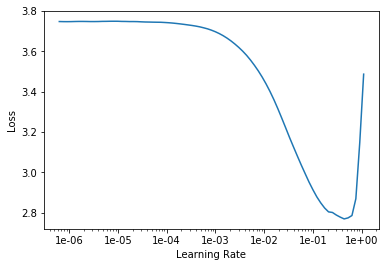

In [221]:
learn.recorder.plot()

In [222]:
learn.fit_one_cycle(10, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.046589,2.535216,0.444105,00:01
1,1.887840,1.504795,0.613281,00:01
2,0.976124,1.183678,0.787500,00:01
3,0.470234,0.977511,0.825000,00:01
4,0.233821,0.850934,0.839560,00:01
5,0.121223,1.012205,0.835440,00:01
6,0.066294,0.906515,0.840980,00:01
7,0.038604,0.970666,0.833949,00:01
8,0.024087,0.981438,0.835582,00:01
9,0.016746,0.984003,0.834233,00:01


In [ ]:
learn.get_preds(ds_type=DatasetType.Valid)

### fastai language_model LSTM 迁移训练模型

#### 释放python内存

In [70]:
learn = None
gc.collect();

#### 自定义模型结构

In [22]:
config = awd_lstm_lm_config.copy()
config['n_layers'] = 3

In [23]:
learn = language_model_learner(data, AWD_LSTM, config=config, pretrained=False, drop_mult=0.3)

#### 默认预训练模型简写格式

In [72]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.3)

In [73]:
learn.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [20, 400]            0          False     
______________________________________________________________________
RNNDropout           [20, 1152]           0          False     
______________________________________________________________________
RNNDropout           [20, 1152]           0          False     
______________________________________________________________________
Linear               [20, 40]             16,040     True      
______________________________________________________________________
RNNDropout           [20, 400]            0          False     
______________________________________________________________________

Total params: 16,040
Total trainable params: 16,040
Total non-trainable params: 0
Optimized with 'torch.optim.adam.Adam', betas=(0.9, 0.99)
Using true weight decay as discussed in https://www.fast.ai/2018/07/02/adam-weight-decay/ 
Loss function :

In [74]:
learn.model

SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(40, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(40, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=40, bias=True)
    (output_dp): RNNDropout()
  )
)

In [75]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


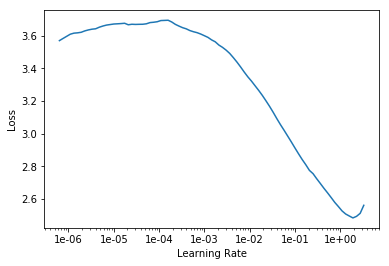

In [76]:
learn.recorder.plot()

In [318]:
# learn.save('LSTM_01')
# learn.load('LSTM_01')

In [77]:
learn.fit_one_cycle(5,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.475033,1.889745,0.475781,00:33
1,1.749840,1.682522,0.498864,00:33
2,1.372908,1.503052,0.543466,00:33
3,1.143191,1.426184,0.559233,00:33
4,1.031744,1.412045,0.563423,00:33


In [78]:
# learn.save('LSTM_fit_head')

In [79]:
# learn.load('LSTM_fit_head')

要完成微调，我们可以解冻模型并开启新的训练。

In [80]:
learn.unfreeze()

In [81]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.802555,1.386475,0.557741,00:56
1,0.619039,1.240833,0.660937,00:49
2,0.383303,0.909026,0.784162,00:49
3,0.210383,0.828368,0.799219,00:49
4,0.118085,0.756673,0.814844,00:49
5,0.069205,0.730728,0.813423,00:49
6,0.050024,0.699719,0.818821,00:49
7,0.034738,0.675654,0.825071,00:49
8,0.028025,0.677864,0.824219,00:49
9,0.024946,0.671269,0.826918,00:49


In [338]:
learn.save('fine_tuned')

我们的模型表现怎么样呢？ 嗯，让我们来看看在几个词过后模型预测出的词是怎样的。

In [100]:
learn.load('fine_tuned');

In [101]:
learn.show_results(ds_type=DatasetType.Valid)

text,target,pred
", eight thousand six , eight thousand seven , eight thousand eight , eight thousand nine , eight thousand ten",",",","
", eight thousand fifty , eight thousand fifty one , eight thousand fifty two , eight thousand fifty three ,",eight,five
"ninety one , eight thousand ninety two , eight thousand ninety three , eight thousand ninety four , eight thousand",ninety,ninety
"thousand one hundred twenty six , eight thousand one hundred twenty seven , eight thousand one hundred twenty eight ,",eight,five
"fifty five , eight thousand one hundred fifty six , eight thousand one hundred fifty seven , eight thousand one",hundred,hundred


In [102]:
learn.predict("thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , ",5)

'thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven ,  thirty eight , thirty nine'

In [104]:
learn.predict("thirty six , thirty seven , ",5)

'thirty six , thirty seven ,  thirty eight , thirty nine'

In [112]:
TEXT = "one , two , three , four , five , six , seven"
N_WORDS = 10
N_SENTENCES = 5

In [126]:
print("\n\n".join(learn.predict(TEXT, N_WORDS, temperature=0.2) for _ in range(N_SENTENCES)))

one , two , three , four , five , six , seven , nine , ten , ten , eleven , twelve

one , two , three , four , five , six , seven , eight , nine , ten , ten , eleven

one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve

one , two , three , four , five , six , seven , eight , nine , ten , ten , eleven

one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve
